In [29]:
###Content-based filtering uses item features to recommend other items similar to what the user likes,
###based on their previous actions or explicit feedback.  
#importing useful lib/pac
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('u.data',sep='\t')
df.columns=['user','item','rating','time']
# return unique users and item/movies
df['user'].nunique() 
df['item'].nunique()


1682

In [6]:
titles=pd.read_csv('u.item',encoding ='iso_ir_226',sep='\|',index_col=False)
title=titles.iloc[:,0:2]
title.columns=['item','name']
title.head()

<ipython-input-6-10c0469559e9>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  titles=pd.read_csv('u.item',encoding ='iso_ir_226',sep='\|',index_col=False)


,item,name
0,2,GoldenEye (1995)
1,3,Four Rooms (1995)
2,4,Get Shorty (1995)
3,5,Copycat (1995)
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...


In [8]:
d=pd.merge(df,title,on='item')

In [22]:
#no of votes/rated to a particular movie
r=d.groupby('name').count()['rating']
r

name
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1663, dtype: int64

c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

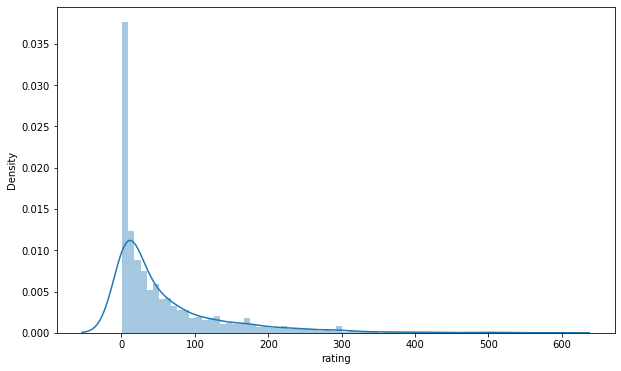

In [34]:
plt.figure(figsize=(10,6))
sns.distplot(r,bins=70)

In [10]:
d.groupby('name').mean()['rating'].sort_values(ascending=False)

name
Santa with Muscles (1996)                     5.0
Saint of Fort Washington, The (1993)          5.0
Prefontaine (1997)                            5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Someone Else's America (1995)                 5.0
                                             ... 
Man from Down Under, The (1943)               1.0
Good Morning (1971)                           1.0
Bird of Prey (1996)                           1.0
Gordy (1995)                                  1.0
Power 98 (1995)                               1.0
Name: rating, Length: 1663, dtype: float64

In [92]:
ratings=pd.DataFrame(d.groupby('name').mean()['rating'])

c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

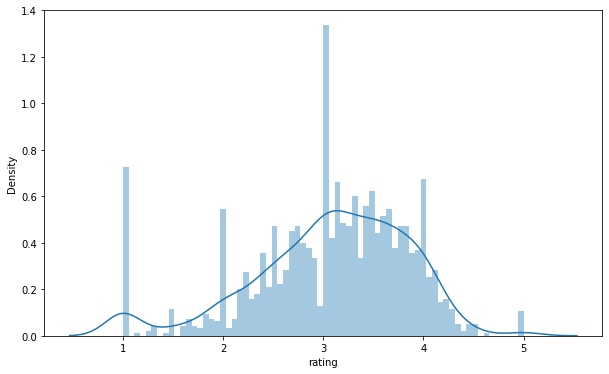

In [93]:
plt.figure(figsize=(10,6))
sns.distplot(ratings['rating'],bins=70)

In [94]:
ratings['no_of_ratings']=pd.DataFrame(r)

In [95]:
ratings

,rating,no_of_ratings
name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


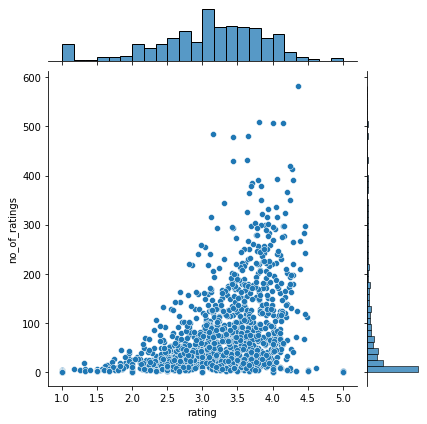

In [41]:
sns.jointplot(x='rating',y='no_of_ratings',data=ratings)


In [52]:
d.head()

,user,item,rating,time,name
0,186,302,3,891717742,L.A. Confidential (1997)
1,191,302,4,891560253,L.A. Confidential (1997)
2,49,302,4,888065432,L.A. Confidential (1997)
3,54,302,4,880928519,L.A. Confidential (1997)
4,62,302,3,879371909,L.A. Confidential (1997)


In [56]:
#this movie matrics for each user and movie rating details
movie_mat=d.pivot_table(index='user',values='rating',columns='name')
movie_mat

name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
ratings.sort_values('no_of_ratings',ascending =False)

,rating,no_of_ratings
name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
Stefano Quantestorie (1993),1.000000,1
Good Morning (1971),1.000000,1


In [66]:
#particular movie rating by user
starwars_user_rating=movie_mat['Star Wars (1977)']

In [97]:
#movies with correlation with starwars/xyz ie: store similar movies 
starwars_similar=movie_mat.corrwith(starwars_user_rating)
starwars_similar

name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1663, dtype: float64

In [107]:
corr_starwar=pd.DataFrame(starwars_similar,columns=['correlation'])
corr_starwar.dropna(inplace=True)
corr_starwar

,correlation
name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [110]:
#sort acc to corr
corr_starwar.sort_values('correlation',ascending=False)

,correlation
name,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Swept from the Sea (1997),-1.0
American Dream (1990),-1.0
Frankie Starlight (1995),-1.0


In [ ]:
corr_starwar=corr_starwar.join(ratings['no_of_ratings'])

In [171]:

corr_starwar[corr_starwar['no_of_ratings']>100]

,correlation,no_of_ratings
name,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
...,...,...
Willy Wonka and the Chocolate Factory (1971),0.221902,326
"Wizard of Oz, The (1939)",0.266335,246
"Wrong Trousers, The (1993)",0.216204,118


In [172]:
#this will give us top reccomended movie for starwars/xyz
corr=corr_starwar.sort_values('correlation',ascending=False)
corr

,correlation,no_of_ratings
name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


 **predict function**

In [178]:
def predict(movie):
    movie_user_rating=movie_mat[movie]
    movie_similar=movie_mat.corrwith(movie_user_rating)
    corr_movie=pd.DataFrame(movie_similar,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['no_of_ratings'])
    pred=corr_movie[corr_movie['no_of_ratings']>100].sort_values('correlation',ascending=False)
    return pred

In [179]:
p=predict("Titanic (1997)")
p.head()

c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\91870\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,no_of_ratings
name,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
